In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 13s 0us/step


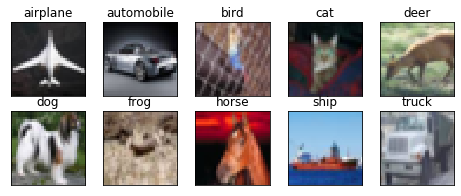

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 18s 46ms/step - loss: 1.8481 - acc: 0.2923 - val_loss: 1.4400 - val_acc: 0.4632
Epoch 2/50
390/390 [==============================] - 9s 22ms/step - loss: 1.3422 - acc: 0.5142 - val_loss: 1.1096 - val_acc: 0.6086
Epoch 3/50
390/390 [==============================] - 9s 22ms/step - loss: 1.1131 - acc: 0.6069 - val_loss: 0.9553 - val_acc: 0.6599
Epoch 4/50
390/390 [==============================] - 9s 22ms/step - loss: 0.9623 - acc: 0.6647 - val_loss: 0.8119 - val_acc: 0.7138
Epoch 5/50
390/390 [==============================] - 9s 22ms/step - loss: 0.8587 - acc: 0.7041 - val_loss: 0.7744 - val_acc: 0.7301
Epoch 6/50
390/390 [==============================] - 9s 22ms/step - loss: 0.7836 - acc: 0.7311 - val_loss: 0.7265 - val_acc: 0.7521
Epoch 7/50
390/390 [==============================] - 9s 23ms/step - loss: 0.7289 - acc: 0.7536 - val_loss: 0.6985 - val_acc: 0.7603
Epoch 8/50
390/390 [==============================] - 9s 23m

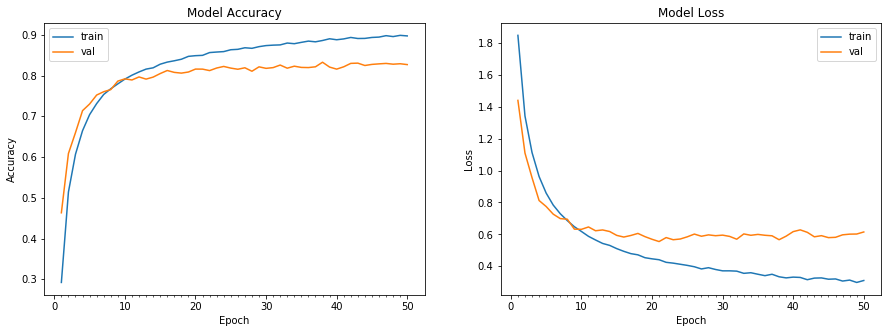

Accuracy on test data is: 82.68


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [29]:
## New model
weight_decay = 0.00001
model1 = Sequential()
model1.add(SeparableConv2D(filters= 32,kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,input_shape=(32,32,3),activation='relu'))  #30
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
# 30*30*32
#RFo=RFi+(k-1)*jin
#Jout=Jin * s
#Jin=1,s=1, RFi=1, k=3, Jout=1
#receptive field = 1+(3-1)*1=3
model1.add(SeparableConv2D(filters= 64,kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) #28
model1.add(Dropout(0.15))
model1.add(BatchNormalization())
# 28*28*64
#Jin=1,s=1, RFi=3, k=3, Jout=1
#receptive field =3+(3-1)*1=5
model1.add(SeparableConv2D(filters= 128,kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) #26
model1.add(BatchNormalization())
model1.add(Dropout(0.15))
# 26*26*128
#Jin=1,s=1, RFi=5, k=3, Jout=1
#receptive field =5+(3-1)*1=7
model1.add(MaxPooling2D(pool_size=(2, 2))) #13
# 13*13*32
#Jin=1,s=2, RFi=7, k=2, Jout=2
#receptive field =7+(2-1)*1=8
#receptive field =8

model1.add(SeparableConv2D(filters= 64,kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) #11
model1.add(BatchNormalization())
model1.add(Dropout(0.15))
# 11*11*64
#Jin=2,s=1, RFi=8, k=3, Jout=2
#receptive field =8+(3-1)*2=12
#receptive field =12

model1.add(SeparableConv2D(filters= 128,kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) #9
model1.add(BatchNormalization())
model1.add(Dropout(0.15))
# 9*9*128
#Jin=2,s=1, RFi=12, k=3, Jout=2
#receptive field =12+(3-1)*2=16
#receptive field =16


model1.add(SeparableConv2D(filters= 256,kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) #7
model1.add(BatchNormalization())
model1.add(Dropout(0.15))
# 7*7*256
#Jin=2,s=1, RFi=16, k=3, Jout=2
#receptive field =16+(3-1)*2=20
#receptive field =20


model1.add(MaxPooling2D(pool_size=(2, 2))) 

# 3*3*256
#Jin=2,s=2, RFi=20, k=2, Jout=4
#receptive field =20+(2-1)*2=22
#receptive field =22

model1.add(SeparableConv2D(filters= 32,kernel_size=(1,1),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) 
model1.add(BatchNormalization())
model1.add(Dropout(0.15))

# 3*3*32
#Jin=4,s=1, RFi=22, k=1, Jout=4
#receptive field =22+(1-1)*4=22
#receptive field =22
model1.add(SeparableConv2D(filters= 10,kernel_size=(3,3),kernel_regularizer=regularizers.l2(weight_decay),depth_multiplier = 1,activation='relu')) 

# 1*1*10
#Jin=4,s=1, RFi=22, k=3, Jout=4
#receptive field =22+(3-1)*4=30
#receptive field =30
model1.add(GlobalAveragePooling2D())
model1.add(Activation('softmax'))

model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_72 (Separab (None, 30, 30, 32)        155       
_________________________________________________________________
batch_normalization_63 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_68 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_73 (Separab (None, 28, 28, 64)        2400      
_________________________________________________________________
dropout_69 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_64 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
separable_conv2d_74 (Separab (None, 26, 26, 128)     

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.005 * 1/(1 + 0.319 * epoch), 10)

model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.005.
390/390 [==============================] - 33s 85ms/step - loss: 1.4791 - acc: 0.4675 - val_loss: 1.4573 - val_acc: 0.5402
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0037907506.
390/390 [==============================] - 27s 69ms/step - loss: 1.0733 - acc: 0.6199 - val_loss: 1.0831 - val_acc: 0.6203
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0030525031.
390/390 [==============================] - 27s 69ms/step - loss: 0.9346 - acc: 0.6718 - val_loss: 1.0347 - val_acc: 0.6399
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.002554931.
390/390 [==============================] - 27s 69ms/step - loss: 0.8433 - acc: 0.7031 - val_loss: 0.8530 - val_acc: 0.7048
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0021968366.
390/390 [==============================] - 27s 69ms/step - loss: 0.7768 - acc: 0.7298 

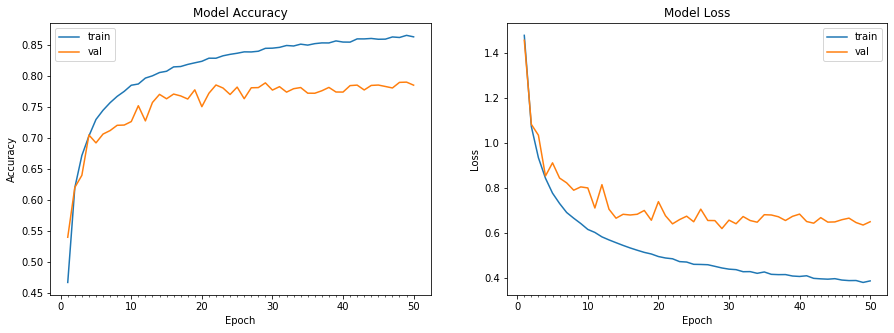

Accuracy on test data is: 78.50


In [31]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model1
start = time.time()
# Train the model1
model1_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model1 history
plot_model_history(model1_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))